In [6]:
import numpy as np

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Loading mnist handwritten dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
print(f'Trainning set: {train_images.shape}, Training labels: {train_labels.shape}\
\nTest set: {test_images.shape}, Test labels: {test_labels.shape}')

Trainning set: (60000, 28, 28), Training labels: (60000,)
Test set: (10000, 28, 28), Test labels: (10000,)


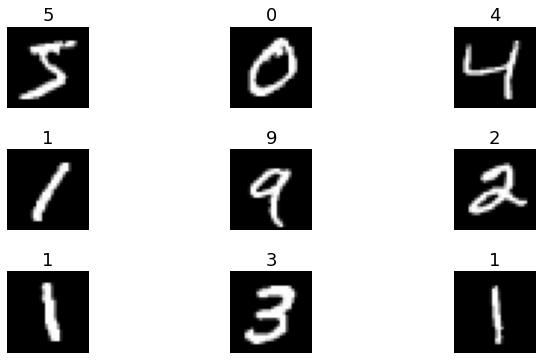

In [20]:
# For visuals
fig, ax = plt.subplots(3, 3, figsize = (12, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)
ax = ax.ravel()

for i in range(9):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap = 'gray')
    ax[i].set_title(train_labels[i], fontsize = 18)

plt.show()

## 2.1 A first look at a neural network

In [21]:
# Reshaping and converting dataset
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [22]:
# Building neural network
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

In [50]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Adding loss function to measure network's performance
# An optimizer - Update mechanism
# Metrics - For monitoring during training and testing
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [26]:
# Preparing the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
# Training the network
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 13s 4ms/step - loss: 0.4405 - accuracy: 0.8695
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1121 - accuracy: 0.9667
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9808
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9888


In [28]:
# Evaluating the network
test_loss, test_acc = network.evaluate(test_images, test_labels)

print(f'Test acc: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0693 - accuracy: 0.9791
Test acc: 0.9790999889373779


## 2.2 Data representations for neural network

Tensor нь вектор болон матрицын ерөнхий нэршил ба олон хэмжээст массив.

1. Скаляр нь 0D tensor

x = np.array(12)


2. Вектор нь 1D tensor

x = np.array([12, 3, 6, 14])

3. Матриц нь 2D tensor

x = np.array([1, 2, 3, 4], 
             [5, 6, 7, 8],
             [9, 10, 11, 12]])

### 2.2.6 Tensor slicing

In [43]:
# Loading mnist handwritten dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

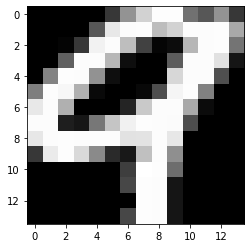

In [48]:
plt.imshow(train_images[4, 7:-7, 7:-7], cmap = 'gray')

### 2.2.7 Data batches

In [49]:
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
# and so on train_images[128 * n:128 * (n+1)]

### 2.2.8 Data tensors

1. Vector Data - 2D tensor: (samples, features)
2. Timeseries - 3D tensor: (samples, timesteps, features)
3. Images - 4D tensor: (samples, height, width, channels)
4. Video - 5D tensor: (samples, frames, height, width, channels)

In [52]:
# Broadcasting

"""
2 tensor-ын хэлбэр нь өөр байхад бага хэмжээтэй нь том шигээ
хэмжээтэй болно. 

Жишээ нь:

A = (a, b, ... n, n + 1, ... m)
B = (n, n + 1, ... m)
"""

def naive_add_matrix_and_vector(x, y):
    #assert len(x.shape) == 2
    #assert len(y.shape) == 1
    #assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [53]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

In [54]:
%timeit naive_add_matrix_and_vector(x, y)

456 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
%timeit np.maximum(x, y)

95 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
